# p16: Poisson equation on [-1,1]x[-1,1] with u=0 on boundary

We solve the following Poisson problem
$$
u_{xx} + u_{yy} = 10\sin(8x(y-1)), \qquad -1 < x,y < 1, \qquad u=0 \quad \mbox{on boundary}
$$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from chebPy import cheb
from numpy import meshgrid,sin,dot,eye,kron,zeros,reshape,linspace
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure,subplot,plot,title,axis,xlabel,ylabel,spy
from matplotlib import cm
from scipy.linalg import solve
from scipy.interpolate import interp2d

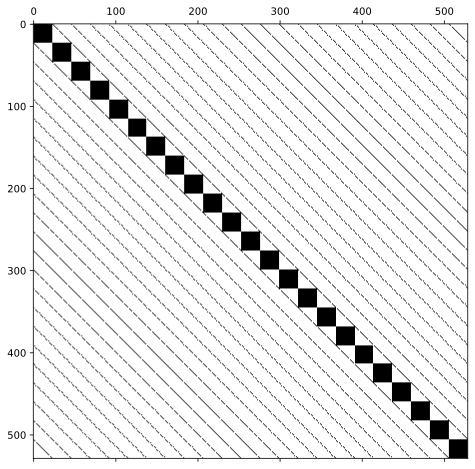

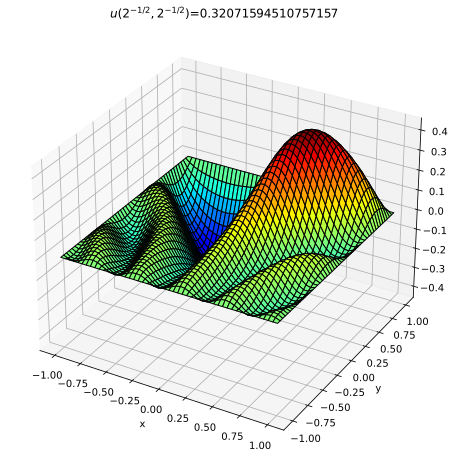

In [4]:
N = 24; D,x = cheb(N); y = x;
xx,yy = meshgrid(x[1:N],y[1:N])
xx = reshape(xx,(N-1)**2)
yy = reshape(yy,(N-1)**2)
f = 10*sin(8*xx*(yy-1))
D2 = dot(D,D); D2 = D2[1:N,1:N]; I = eye(N-1)
L = kron(I,D2) + kron(D2,I)
# Plot sparsity pattern
figure(figsize=(8,8)), spy(L)
# Solve Lu=f
u = solve(L,f)
# Convert 1-d vectors to 2-d
uu = zeros((N+1,N+1)); uu[1:N,1:N] = reshape(u,(N-1,N-1))
[xx,yy] = meshgrid(x,y)
value = uu[N//4,N//4]

# Interpolate to finer mesh just for visualization
f = interp2d(x,y,uu,kind='cubic')
xxx = linspace(-1.0,1.0,50)
uuu = f(xxx,xxx)
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
X,Y = meshgrid(xxx,xxx)
ax.plot_surface(X,Y,uuu,rstride=1,cstride=1,cmap=cm.jet,edgecolor='black')
title("$u(2^{-1/2},2^{-1/2})$="+str(value))
xlabel("x"); ylabel("y");